# Aplicando Python para análisis de precios: manejando, organizando y bajando datos con pandas

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="400px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="400px" height="125px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 1. Importar datos desde holas de cálculo (como las de excel)

### 1.1. ¿Porqué hojas de cálculo?

- Seguramente todos han trabajado con hojas de cálculo de excel, almenos para cosas básicas.
- Esta herramienta nos ayuda a organizar, analizar y guardar datos en tablas.
- Este software es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea. Para esto usar **buscar y reemplazar** con guiones bajos, puntos, etcétera.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $,%, ^, &, *, (,),-,#, ?,,,<,>, /, |, \, [ ,] ,{, and }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL), Amazon (AMZN), Microsoft (MSFT) y NVIDIA (NVDA) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2011 al 31-12-2016 y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

Luego de esto, seguir las indicaciones dadas en **1.2.**

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [1]:
# Importamos pandas
import pandas as pd

Para leer archivos .csv, utilizaremos la función `pd.read_csv`...

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [6]:
# Cargamos hoja de calculo en un dataframe
# file_apple = 'precios/AAPL.csv'
file_apple = 'precios/AAPL.csv'
df_apple = pd.read_csv(file_apple)
df_apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,111.389999,111.440002,107.349998,109.330002,102.319397,53204600
1,2015-01-05,108.290001,108.650002,105.410004,106.250000,99.436890,64285500
2,2015-01-06,106.540001,107.430000,104.629997,106.260002,99.446251,65797100
3,2015-01-07,107.199997,108.199997,106.699997,107.750000,100.840714,40105900
4,2015-01-08,109.230003,112.150002,108.699997,111.889999,104.715256,59364500
...,...,...,...,...,...,...,...
750,2017-12-22,174.679993,175.419998,174.500000,175.009995,173.023026,16114600
751,2017-12-26,170.800003,171.470001,169.679993,170.570007,168.633423,33185500
752,2017-12-27,170.100006,170.779999,169.710007,170.600006,168.663101,21498200
753,2017-12-28,171.000000,171.850006,170.479996,171.080002,169.137650,16480200


Acá hay varias cosas por notar.

- Quisieramos indizar por fecha.
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj_Close).

In [7]:
# Cargamos hoja de calculo en un dataframe
file_apple = 'precios/AAPL.csv'
df_apple = pd.read_csv(file_apple, index_col='Date', usecols=['Date', 'Adj Close'])
df_apple

,Adj Close
Date,
2015-01-02,102.319397
2015-01-05,99.436890
2015-01-06,99.446251
2015-01-07,100.840714
2015-01-08,104.715256
...,...
2017-12-22,173.023026
2017-12-26,168.633423
2017-12-27,168.663101


Ahora, grafiquemos...

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

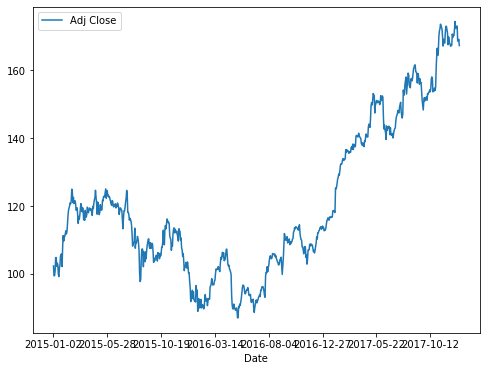

In [9]:
df_apple.plot(figsize=(8,6));

**Actividad.** Importen todos los archivos .csv como acabamos de hacerlo con el de apple. Además, crear un solo DataFrame que cuyos encabezados por columna sean los nombres respectivos (AAPL, AMZN,...) y contengan los datos de precio de cierre.

In [15]:
file_amazon = 'precios/AMZN.csv'
file_apple = 'precios/AAPL.csv'
file_nike = 'precios/NKE.csv'

df_amazon = pd.read_csv(file_amazon, index_col='Date', usecols=['Date', 'Adj Close'])
df_apple = pd.read_csv(file_apple, index_col='Date', usecols=['Date', 'Adj Close'])
df_nike = pd.read_csv(file_nike, index_col='Date', usecols=['Date', 'Adj Close'])

In [16]:
closes = pd.DataFrame(index=df_amazon.index, columns=['AAPL', 'AMZN', 'NKE'])
closes.index.name = 'Date'
closes['AAPL'] = df_apple
closes['AMZN'] = df_amazon
closes['NKE'] = df_nike
closes

,AAPL,AMZN,NKE
Date,,,
2015-01-02,102.319397,308.519989,44.868027
2015-01-05,99.436890,302.190002,44.145645
2015-01-06,99.446251,295.290009,43.885963
2015-01-07,100.840714,298.420013,44.792484
2015-01-08,104.715256,300.459991,45.826481
...,...,...,...
2017-12-22,173.023026,1168.359985,62.768768
2017-12-26,168.633423,1176.760010,63.125809
2017-12-27,168.663101,1182.260010,62.431568


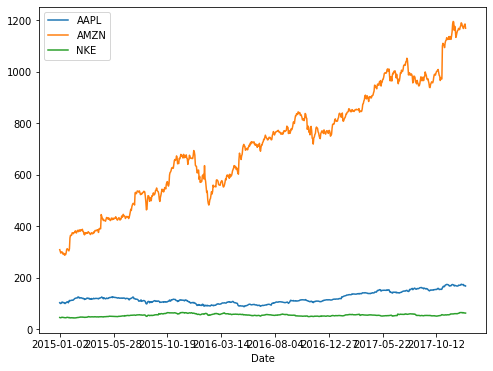

In [17]:
closes.plot(figsize=(8,6));

## 2. Descargar directamente los datos
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda:
*conda install -c conda-forge pandas-datareader*

- Anaconda prompt

https://pandas-datareader.readthedocs.io/en/latest/

In [18]:
from pandas_datareader import data

C:\Users\nxf42787\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Utilizaremos la función `data.DataReader`...

In [19]:
help(data.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [22]:
# Definimos los instrumentos que vamos a descargar. Como antes tendremos Apple, Amazon, Microsoft y Nvidia.
tickers = ['NXPI','AAPL', 'AMZN', 'MSFT', 'NVDA']

# Definimos que fuente online vamos a usar (yahoo finance)
data_source = 'yahoo'

# Queremos los datos desde 01/01/2011 hasta 31/12/2016.
start_date = '2011-01-01'
end_date = '2016-12-31'

# Usamos la función DataReader. Si, así de fácil...
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

¿Qué contiene esta variable?

In [23]:
panel_data

Attributes  Adj Close                                                 \
Symbols          NXPI        AAPL        AMZN       MSFT        NVDA   
Date                                                                   
2011-01-03  20.893112   40.758278  184.220001  22.358212   14.553763   
2011-01-04  21.458578   40.970993  185.009995  22.446114   14.507762   
2011-01-05  22.794254   41.306126  187.419998  22.374191   15.620916   
2011-01-06  22.657766   41.272743  185.860001  23.029436   17.782816   
2011-01-07  22.345783   41.568314  185.490005  22.853636   18.279594   
...               ...         ...         ...        ...         ...   
2016-12-23  95.739784  110.743988  760.590027  59.590977  108.510994   
2016-12-27  96.519722  111.447319  771.400024  59.628666  115.963829   
2016-12-28  95.925011  110.972122  772.130005  59.355404  107.987129   
2016-12-29  95.642281  110.943588  765.150024  59.270599  110.141922   
2016-12-30  95.554550  110.078697  749.869995  58.554443  105.506119   

Attributes      Close                                                 ...  \
Symbols          NXPI        AAPL        AMZN       MSFT        NVDA  ...   
Date                                                                  ...   
2011-01-03  21.430000   47.081429  184.220001  27.980000   15.820000  ...   
2011-01-04  22.010000   47.327145  185.009995  28.090000   15.770000  ...   
2011-01-05  23.379999   47.714287  187.419998  28.000000   16.980000  ...   
2011-01-06  23.240000   47.675713  185.860001  28.820000   19.330000  ...   
2011-01-07  22.920000   48.017143  185.490005  28.600000   19.870001  ...   
...               ...         ...         ...        ...         ...  ...   
2016-12-23  98.199997  116.519997  760.590027  63.240002  109.779999  ...   
2016-12-27  99.000000  117.260002  771.400024  63.279999  117.320000  ...   
2016-12-28  98.389999  116.760002  772.130005  62.990002  109.250000  ...   
2016-12-29  98.099998  116.730003  765.150024  62.900002  111.430000  ...   
2016-12-30  98.010002  115.820000  749.869995  62.139999  106.739998  ...   

Attributes       Open                                                 \
Symbols          NXPI        AAPL        AMZN       MSFT        NVDA   
Date                                                                   
2011-01-03  21.200001   46.520000  181.369995  28.049999   15.520000   
2011-01-04  21.900000   47.491428  186.149994  27.940001   15.850000   
2011-01-05  21.870001   47.078571  184.100006  27.900000   16.059999   
2011-01-06  23.730000   47.817142  186.500000  28.040001   17.420000   
2011-01-07  23.330000   47.712856  187.880005  28.639999   19.110001   
...               ...         ...         ...        ...         ...   
2016-12-23  97.900002  115.589996  764.549988  63.450001  106.379997   
2016-12-27  98.400002  116.519997  763.400024  63.209999  112.059998   
2016-12-28  99.110001  117.519997  776.250000  63.400002  119.599998   
2016-12-29  98.400002  116.449997  772.400024  62.860001  104.900002   
2016-12-30  98.160004  116.650002  766.469971  62.959999  111.349998   

Attributes     Volume                                                  
Symbols          NXPI         AAPL       AMZN        MSFT        NVDA  
Date                                                                   
2011-01-03   256100.0  111284600.0  5331400.0  53443800.0  20436200.0  
2011-01-04   952100.0   77270200.0  5031800.0  54405600.0  16284600.0  
2011-01-05   846400.0   63879900.0  3418800.0  58998700.0  35705400.0  
2011-01-06   453100.0   75107200.0  3179700.0  88026300.0  87332800.0  
2011-01-07   300900.0   77982800.0  5221700.0  73762000.0  64499600.0  
...               ...          ...        ...         ...         ...  
2016-12-23  1053100.0   14249500.0  1981600.0  12403800.0  16192300.0  
2016-12-27  1506600.0   18296900.0  2638700.0  11763200.0  29856800.0  
2016-12-28  2359300.0   20905900.0  3301000.0  14653300.0  57394100.0  
2016-12-29  1823300.0   15039500.0  315

Como antes, solo nos interesan los precios de cierre ajustados...

In [25]:
# Notar que los índices se indican como Major_axis
closes = panel_data['Adj Close']
closes

Symbols,NXPI,AAPL,AMZN,MSFT,NVDA
Date,,,,,
2011-01-03,20.893112,40.758278,184.220001,22.358212,14.553763
2011-01-04,21.458578,40.970993,185.009995,22.446114,14.507762
2011-01-05,22.794254,41.306126,187.419998,22.374191,15.620916
2011-01-06,22.657766,41.272743,185.860001,23.029436,17.782816
2011-01-07,22.345783,41.568314,185.490005,22.853636,18.279594
...,...,...,...,...,...
2016-12-23,95.739784,110.743988,760.590027,59.590977,108.510994
2016-12-27,96.519722,111.447319,771.400024,59.628666,115.963829
2016-12-28,95.925011,110.972122,772.130005,59.355404,107.987129


Reordenamos las fechas...

In [26]:
# Generamos todas los días entre las fechas dadas
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# Reindizamos en este orden
closes = closes.reindex(all_weekdays)
closes

Symbols,NXPI,AAPL,AMZN,MSFT,NVDA
2011-01-03,20.893112,40.758278,184.220001,22.358212,14.553763
2011-01-04,21.458578,40.970993,185.009995,22.446114,14.507762
2011-01-05,22.794254,41.306126,187.419998,22.374191,15.620916
2011-01-06,22.657766,41.272743,185.860001,23.029436,17.782816
2011-01-07,22.345783,41.568314,185.490005,22.853636,18.279594
...,...,...,...,...,...
2016-12-26,NaN,NaN,NaN,NaN,NaN
2016-12-27,96.519722,111.447319,771.400024,59.628666,115.963829
2016-12-28,95.925011,110.972122,772.130005,59.355404,107.987129
2016-12-29,95.642281,110.943588,765.150024,59.270599,110.141922


Las fechas para las que no se tienen datos quedan marcadas con `ǸaN`

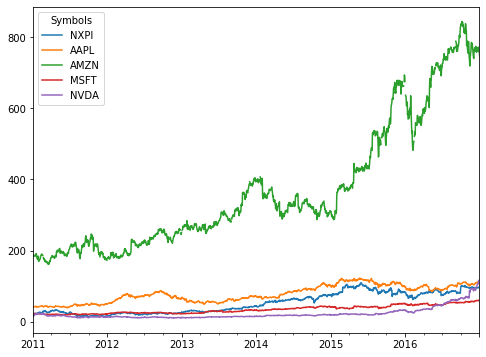

In [27]:
# Se verán 'huecos' en la gráfica
closes.plot(figsize=(8,6));

In [28]:
# Llenamos los huecos con el precio de cierre del día anterior
closes = closes.fillna(method='ffill')
closes

Symbols,NXPI,AAPL,AMZN,MSFT,NVDA
2011-01-03,20.893112,40.758278,184.220001,22.358212,14.553763
2011-01-04,21.458578,40.970993,185.009995,22.446114,14.507762
2011-01-05,22.794254,41.306126,187.419998,22.374191,15.620916
2011-01-06,22.657766,41.272743,185.860001,23.029436,17.782816
2011-01-07,22.345783,41.568314,185.490005,22.853636,18.279594
...,...,...,...,...,...
2016-12-26,95.739784,110.743988,760.590027,59.590977,108.510994
2016-12-27,96.519722,111.447319,771.400024,59.628666,115.963829
2016-12-28,95.925011,110.972122,772.130005,59.355404,107.987129
2016-12-29,95.642281,110.943588,765.150024,59.270599,110.141922


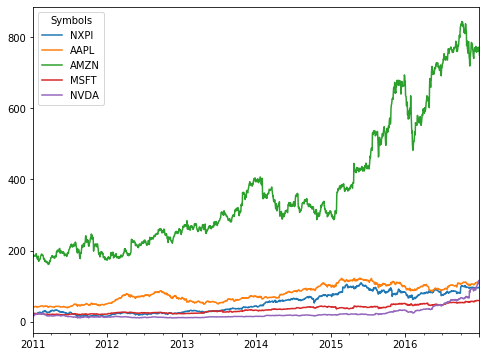

In [29]:
# Gráfico limpio...
closes.plot(figsize=(8,6));

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [30]:
closes.describe()

Symbols,NXPI,AAPL,AMZN,MSFT,NVDA
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,52.097060,78.158827,370.713157,34.141365,22.501495
std,28.575555,23.667207,184.086742,11.055840,16.813138
min,13.337274,38.995956,160.970001,19.183052,10.469141
25%,25.095129,56.849113,228.289993,24.152510,13.367013
50%,43.014652,75.065872,310.029999,32.301857,17.212444
75%,79.857895,100.230888,438.559998,42.409435,21.742521
max,109.437782,122.150032,844.359985,59.949043,115.963829


___
Recapitulando, hoy aprendimos a obtener datos con pandas, tanto desde archivos de texto separados por comas, como directamente desde fuentes remotas.
- Para nuestra aplicación resulta más útil y más fácil obtenerlos directamente desde Yahoo Finance.
- Sin embargo, muchas veces tendrán que adquirir los datos desde planillas de Excel y  por tanto deben tener este conocimiento.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.